<a href="https://colab.research.google.com/github/lucasprogty/Algueis_Uberlandia/blob/main/day_74.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Entendendo a relaçao entre temas de LEGO x sets de LEGO



Explorando a loja de lego nos vamos ver seus produtos organizados por nome. Os nomes incluem Star Wars, Batman, Harry Pottere muitos outros.
<img src="https://i.imgur.com/49FNOHj.jpg">




In [13]:
import pandas as pd
import matplotlib.pyplot as plt

colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
#quantas cores unicas nos temos
cores_unicas = colors.nunique(axis=1)
cores_unicas



,0
0,4
1,4
2,4
3,4
4,4
...,...
130,4
131,4
132,4
133,4


In [5]:
#quantidade de transparente e opaca usando o metodo group by e count
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [7]:
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [11]:
#quantos legos foram feitos no ano de 1949?
#seleciona os registro do data frame onde o ano e igual a 1949
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [14]:
#selecionando os temas de lego que possuem a maior quantidade de peças
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


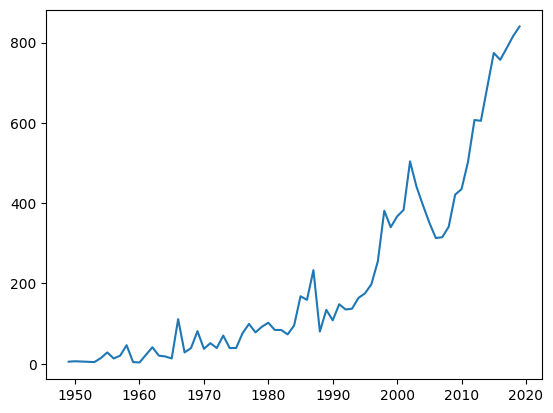

In [17]:
#calculando o numero de sets por ano e fazendo um grafico
#o agrupamento por data significa quantas entradas/registros tiveram essa data. Por exemplo no ano de 1949 tivemos 5 registros/temas lançados
sets_per_year = sets.groupby('year').count()
sets_per_year['set_num'].head()
plt.plot(sets_per_year.index[:-2], sets_per_year.set_num[:-2])
plt.show()

In [19]:
#aprendendo a usar o .agg()
themes_per_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

themes_per_year.rename(columns= {'theme_id': 'nr_themes'}, inplace=True)
themes_per_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [21]:
themes_per_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


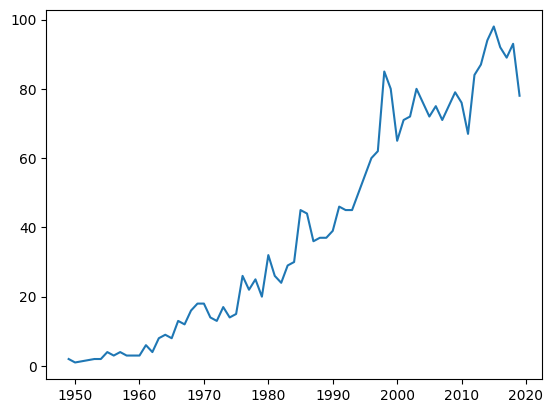

In [23]:
plt.plot(themes_per_year.index[:-2], themes_per_year.nr_themes[:-2])
plt.show()

Text(0, 0.5, 'Numero de tematicas')

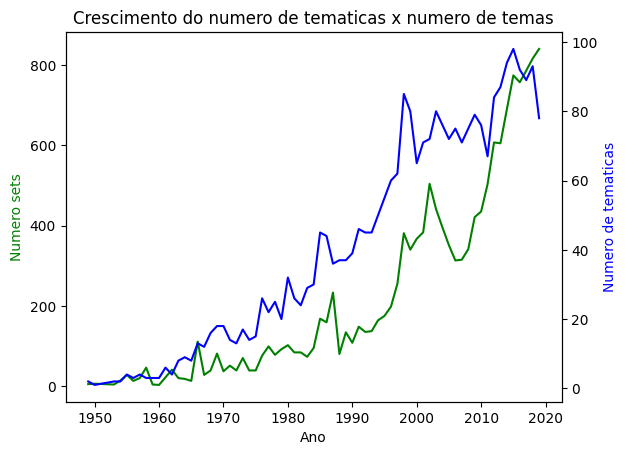

In [49]:
#agora vamos fazer um grafico contendo duas informaçoes
#o metodo .twinx() nos permite criar outro eixo, dessa maneira podemos comparar um valor de x para dois y diferentes.
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_per_year.index[:-2], sets_per_year.set_num[:-2], color='g')
ax2.plot(themes_per_year.index[:-2], themes_per_year[:-2], 'b')

plt.title('Crescimento do numero de tematicas x numero de temas')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Numero sets', color='green')
ax2.set_ylabel('Numero de tematicas', color='blue')


Text(0, 0.5, 'Numero de peças')

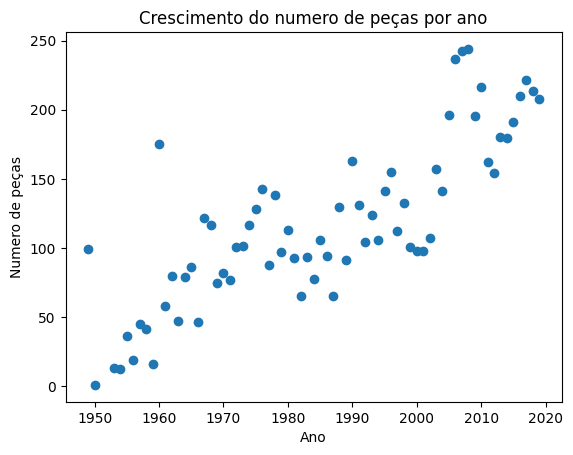

In [47]:
#usando .groupby() e .agg() para criar um novo df
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
#agora vamos fazer um grafico de dispersao para entender o tamanho e complexidade dos sets de lego baseando-se na media de peças
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])
plt.title('Crescimento do numero de peças por ano')
plt.xlabel('Ano')
plt.ylabel('Numero de peças')


#Utilizando conceitos de foreign keys e primary keys para mesclar dois dataFrames

<img src="https://i.imgur.com/Sg4lcjx.png">

In [32]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [34]:
themes[themes.name == 'Star Wars']


,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [36]:
sets[sets.theme_id == 18]


,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [38]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [42]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]


set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


<BarContainer object of 10 artists>

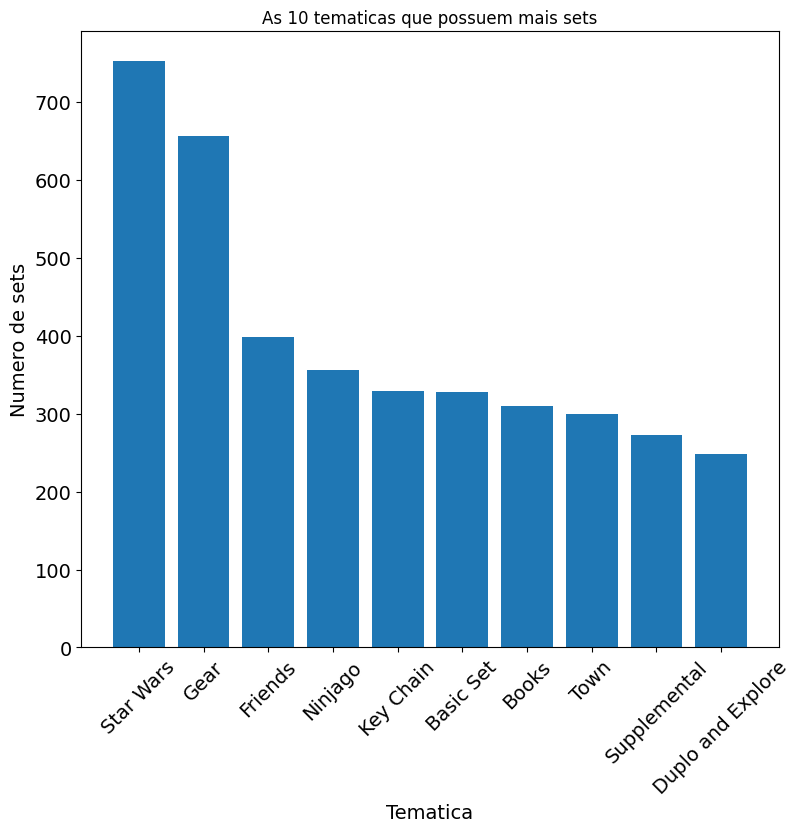

In [54]:
merged_df = pd.merge(set_theme_count, themes, on='id')
#agora vamos criar um grafico com o nome dos dez primeiros themas que possuem mais sets

plt.figure(figsize=(9, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('As 10 tematicas que possuem mais sets')
plt.ylabel('Numero de sets', fontsize=14)
plt.xlabel('Tematica', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])